In [1]:
"""Python WPS execute"""
from owslib.wps import WebProcessingService, monitorExecution, printInputOutput
from os import system

In [2]:
wps_url = "http://localhost:8093/wps"
#wps_url = "http://birdhouse-lsce.extra.cea.fr:8093/wps"
wps = WebProcessingService(url=wps_url, verbose=False)

In [3]:
print wps.identification.title

Flyingpigeon


In [4]:
for process in wps.processes:
    print '%s : \t %s' % (process.identifier, process.abstract)

visualisation : 	 Just testing a nice script to visualise some variables
segetalflora : 	 Species biodiversity of segetal flora. Imput files: variable:tas , domain: EUR-11 or EUR-44
indices_single : 	 This process calculates climate indices based on one single variable.
subset_countries : 	 This process returns only the given polygon from input netCDF files.
eobs_to_cordex : 	 downloads EOBS data in adaped CORDEX format
ensembleRobustness : 	 Calculates the robustness as the ratio of noise to signal in an ensemle of timeseries
analogs : 	 Search for days with analog pressure pattern


In [5]:
p = wps.describeprocess(identifier='ensembleRobustness')
for input in p.dataInputs:
    printInputOutput(input)
    print '\n'

 identifier=resource, title=NetCDF Files, abstract=NetCDF Files, data type=ComplexData
 Supported Value: mimeType=application/x-netcdf, encoding=None, schema=None
 Default Value: mimeType=application/x-netcdf, encoding=None, schema=None 
 minOccurs=1, maxOccurs=100


 identifier=start, title=Start Year, abstract=Beginn of the analysed period (e.g 1971; if not set, the first consistend year of the ensemble will be taken), data type=//www.w3.org/TR/xmlschema-2/#integer
 Any value allowed
 Default Value: None 
 minOccurs=0, maxOccurs=1


 identifier=end, title=End Year, abstract=End of the analysed period (e.g. 2050 if not set, the last consistend year of the ensemble will be taken), data type=//www.w3.org/TR/xmlschema-2/#integer
 Any value allowed
 Default Value: None 
 minOccurs=0, maxOccurs=1


 identifier=timeslice, title=Time slice, abstract=Time slice (in years) for robustness reference (default=10)), data type=//www.w3.org/TR/xmlschema-2/#integer
 Any value allowed
 Default Value: 

# Call WPS with oswlib

In [6]:
files = []

for i in range(1,16): # 
    #files.append('file:///home/estimr1/EUCLEIA/indices/RX5day/DJF/RX5day_DJF_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))
    files.append('file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))
    

In [7]:
files 

['file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p1_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p2_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p3_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p4_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p5_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p6_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p7_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p8_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p9_19600101-20131230.nc',
 'file:///home/estimr1/EUCLEIA/indice

In [27]:
from os.path import join

execute = wps.execute(
    identifier="ensembleRobustness", #indices_clipping",
    inputs=[
       ("resource",files[0]),
       ("resource",files[1]),
     #  ("resource",files[2]),
     #  ("resource",files[3]),
     #  ("resource",files[4]),
     #  ("resource",files[5]),
     #  ("resource",files[6]),
     #  ("resource",files[7]),
     #  ("resource",files[8]),
     #  ("resource",files[9]),
     #  ("resource",files[10]),
     #  ("resource",files[11]),
     #  ("resource",files[12]),
     #  ("resource",files[13]),
     #  ("resource",files[14])
     #   ("timeslice",'10')
           ])

monitorExecution(execute, sleepSecs=5)
print execute.getStatus()

ProcessSucceeded


In [28]:
for o in execute.processOutputs:
    print o.reference 

http://localhost:8090/wpsoutputs/flyingpigeon/output_graphic-df05a98e-d59e-11e5-8be0-95df10b20b9b.png
http://localhost:8090/wpsoutputs/flyingpigeon/output_high-df05a98e-d59e-11e5-8be0-95df10b20b9b.nc
http://localhost:8090/wpsoutputs/flyingpigeon/output_text-df05a98e-d59e-11e5-8be0-95df10b20b9b.txt
http://localhost:8090/wpsoutputs/flyingpigeon/output_low-df05a98e-d59e-11e5-8be0-95df10b20b9b.nc
http://localhost:8090/wpsoutputs/flyingpigeon/output_signal-df05a98e-d59e-11e5-8be0-95df10b20b9b.nc


# call the module only 

In [12]:
from flyingpigeon.ensembleRobustness import worker

/homel/nhempel/.conda/envs/birdhouse/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


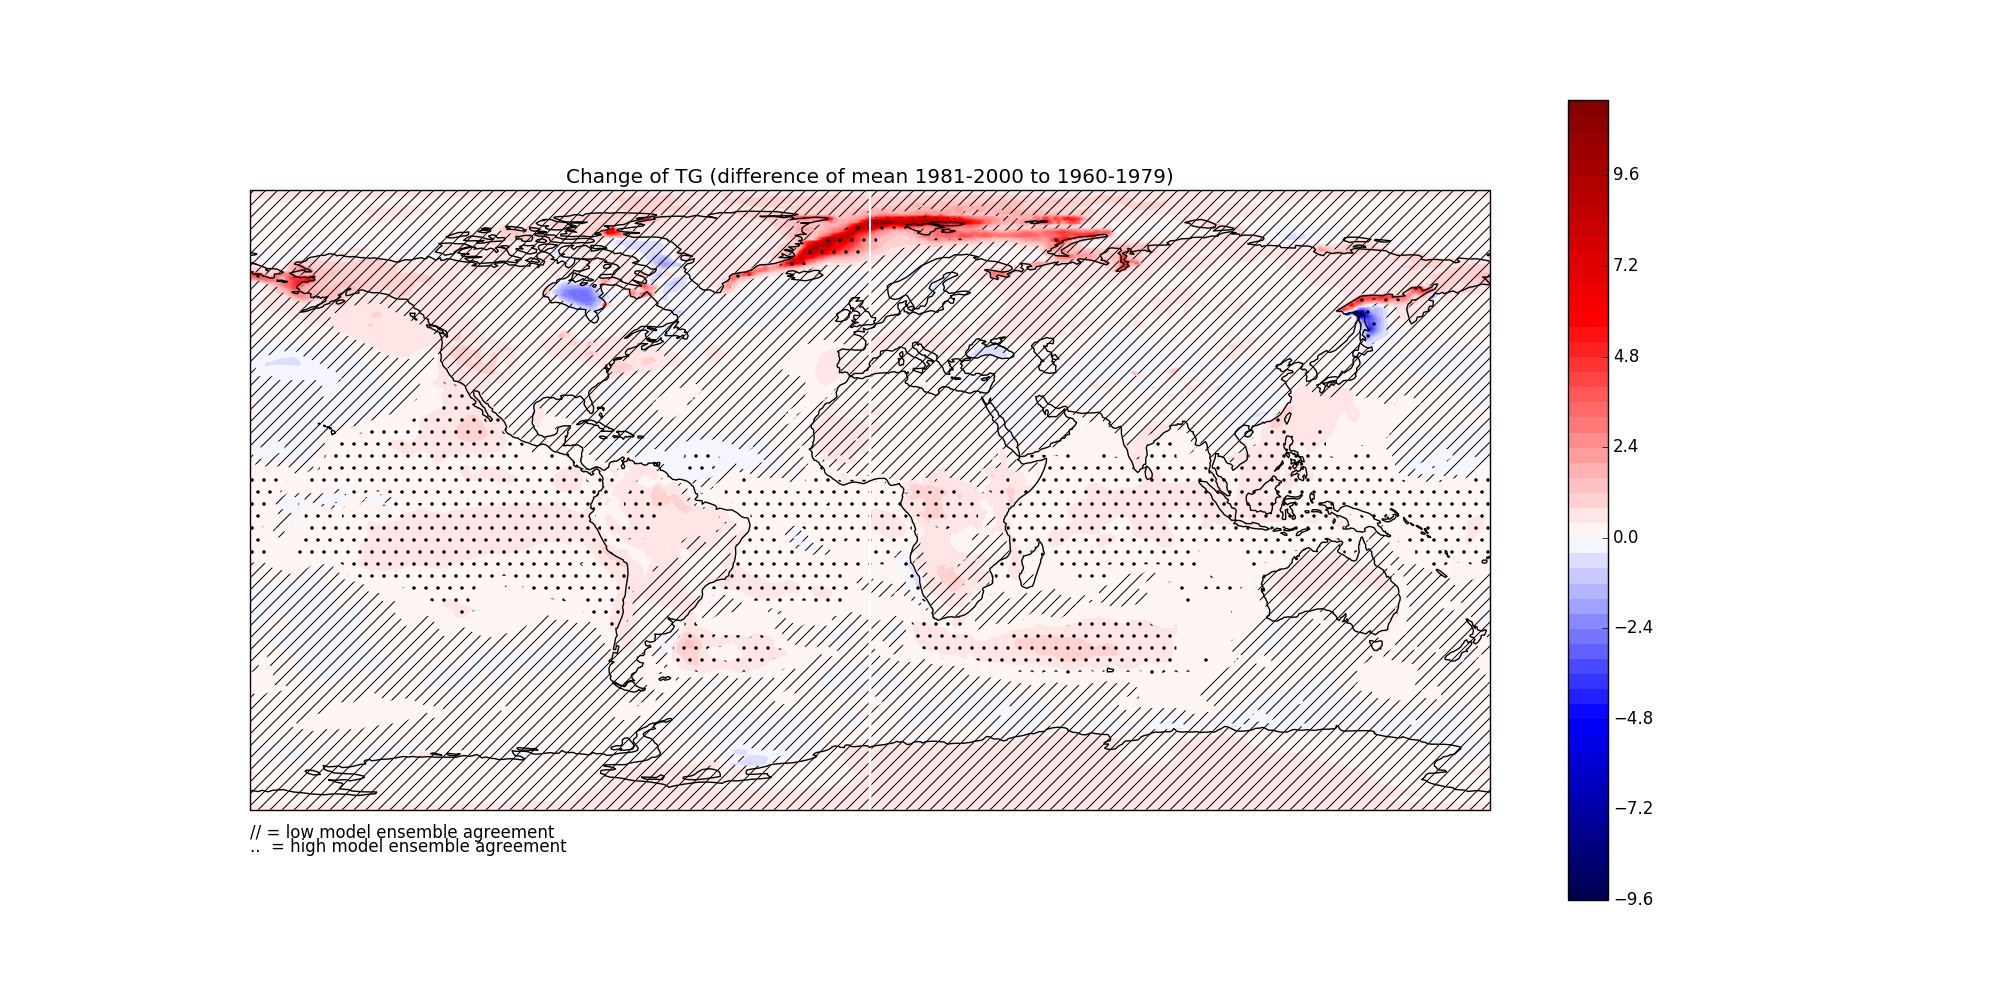

In [13]:
files = []

for i in range(1,16): # 
    files.append('/home/estimr1/EUCLEIA/indices/TG/DJF/TG_DJF_HadGEM3-A-N216_historical_r1i1p%s_19600101-20131230.nc' % (i))

signal, low_agreement_mask, high_agreement_mask, graphic, text = worker(resource=files, start=1960, end=2000,
                                                                  timeslice=20, variable='TG')

from IPython.display import Image
Image(filename=graphic)

# build url for symetric WPS call:

In [14]:
sync_req_url = "{wps_url}?" +\
    "request=Execute" +\
    "&service=WPS" +\
    "&version=1.0.0" +\
    "&identifier=ensembleRobustness" +\
    "&DataInputs=resource={resource1};resource={resource2}" +\
    "&storeExecuteResponse=false" +\
    "&status=false"

In [15]:
url=sync_req_url.format(
    wps_url=wps_url,
    resource1=files[0],
    resource2=files[1],)
print url   

http://birdhouse-lsce.extra.cea.fr:8093/wps?request=Execute&service=WPS&version=1.0.0&identifier=ensembleRobustness&DataInputs=resource=/home/estimr1/EUCLEIA/indices/TG/DJF/TG_DJF_HadGEM3-A-N216_historical_r1i1p1_19600101-20131230.nc;resource=/home/estimr1/EUCLEIA/indices/TG/DJF/TG_DJF_HadGEM3-A-N216_historical_r1i1p2_19600101-20131230.nc&storeExecuteResponse=false&status=false


# build url for asymetric WPS call:

In [27]:
import requests

In [28]:
r = ''
for i in range(1,16):
    r= '%sresource={resource%s};' % (r,i)
print r    

resource={resource1};resource={resource2};resource={resource3};resource={resource4};resource={resource5};resource={resource6};resource={resource7};resource={resource8};resource={resource9};resource={resource10};resource={resource11};resource={resource12};resource={resource13};resource={resource14};resource={resource15};


In [29]:
async_req_url = "{wps_url}?" +\
    "request=Execute" +\
    "&service=WPS" +\
    "&version=1.0.0" +\
    "&identifier=ensembleRobustness" +\
    "&DataInputs="+r+\
    "&storeExecuteResponse=true" +\
    "&status=true"

In [30]:
url=async_req_url.format(
    wps_url=wps_url,
    resource1=files[0],
    resource2=files[1],
    resource3=files[2],    
    resource4=files[3],
    resource5=files[4],
    resource6=files[5],
    resource7=files[6],
    resource8=files[7],
    resource9=files[8],
    resource10=files[9],
    resource11=files[10],
    resource12=files[11],
    resource13=files[12],
    resource14=files[13],
    resource15=files[14]
)
print url 

http://birdhouse-lsce.extra.cea.fr:8093/wps?request=Execute&service=WPS&version=1.0.0&identifier=ensembleRobustness&DataInputs=resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p1_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p2_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p3_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p4_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p5_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p6_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p7_19600101-20131230.nc;resource=file:///home/estimr1/EUCLEIA/indices/TG/yr/TG_yr_HadGEM3-A-N216_historical_r1i1p

In [31]:
r = requests.get(url)
from lxml import etree
from io import BytesIO
tree = etree.parse(BytesIO(r.content))
#print etree.tostring(tree)
status_url = tree.getroot().get("statusLocation")
print status_url

http://birdhouse-lsce.extra.cea.fr:8090/wpsoutputs/flyingpigeon/pywps-2af97d84-d40f-11e5-9a23-ff01ef49d1c2.xml


In [26]:
r = requests.get(status_url)
print r.status_code
print r.text

200
<?xml version="1.0" encoding="utf-8"?>
<wps:ExecuteResponse xmlns:wps="http://www.opengis.net/wps/1.0.0" xmlns:ows="http://www.opengis.net/ows/1.1" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.opengis.net/wps/1.0.0 http://schemas.opengis.net/wps/1.0.0/wpsExecute_response.xsd" service="WPS" version="1.0.0" xml:lang="en-CA" serviceInstance="http://birdhouse-lsce.extra.cea.fr:8093/wps?service=WPS&amp;request=GetCapabilities&amp;version=1.0.0" statusLocation="http://birdhouse-lsce.extra.cea.fr:8090/wpsoutputs/flyingpigeon/pywps-13e7bfb2-d40e-11e5-9a23-ff01ef49d1c2.xml">
    <wps:Process wps:processVersion="0.2">
        <ows:Identifier>ensembleRobustness</ows:Identifier>
        <ows:Title>Calculation of the robustness of an ensemle</ows:Title>
        <ows:Abstract>Calculates the robustness as the ratio of noise to signal in an ensemle of timeseries</ows:Abstract>
        <ows:Metadata xlink:title="LSCE

In [ ]:
graphic = 'http://localhost:8090/wpsoutputs/flyingpigeon/output_graphic-5442f43a-ce61-11e5-a317-434222d428b1.png'

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= graphic )